In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

In [2]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^5$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [3]:
data=np.exp(random.randn(100_000))

__In the below code box, plot a histogram of the array `data` as one figure and a histogram of the log of the data as a second figure.  Use 100 bins for each plot. Note:__ if you precede each plotting command by  `plt.figure()` it will make the plot on a separate set of axes, even if the code is in the same cell...

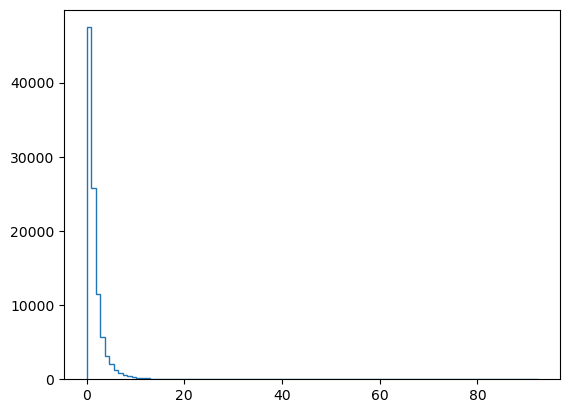

In [18]:
fig1 = plt.figure()
n,bins,patches=plt.hist(data,bins=100,histtype='step') 
fig.savefig('hist_100bins.png')

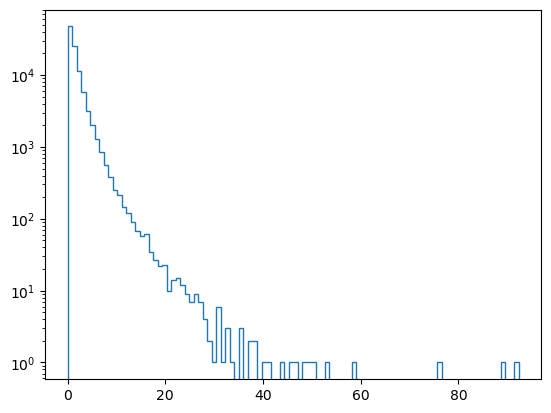

In [17]:
fig = plt.figure()
n,bins,patches=plt.hist(data,bins=100,histtype='step') 
plt.yscale('log')
fig.savefig('hist_100bins_log.png')

Calculating the mean:

In [5]:
print(np.mean(data))
print( data.mean() )

1.6478392045052037
1.6478392045052037


Calculating the median:

In [6]:
print(np.median(data))

1.0001133557128283


Calculating the mode:

In [13]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data,decimals=2)
print(f'Rounded: {stats.mode(data_r)}' )

Unrounded: ModeResult(mode=np.float64(0.015635546770862863), count=np.int64(1))
Rounded: ModeResult(mode=np.float64(0.3), count=np.int64(687))


In [14]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.30000000000000004


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [19]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range).
# as those are unlikely to be what you want
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

In [20]:
print(mode2(data))

4.63053778852521


In [21]:
print(mode2(data,bins=100))

0.4771257709462976


In [22]:
print(mode2(data,bins=200))

0.707870883034015


In [23]:
print(mode2(data,bins=150))

0.3232956962211527


In [24]:
print(mode2(data,bins=140))

0.34527142118188764


In [25]:
print(mode2(data,bins=160)) # this is the best one for me 
# can also be a range or array which would leave to even better accuracy

0.30406693688050956


In [26]:
print(mode2(data,bins=170))

0.2871003845211186


# Calculating measures of scale

First, the standard deviation:


In [27]:
print( np.std(data),np.std(data,ddof=1) )
print( np.std(np.log(data)),np.std(np.log(data),ddof=1) )

2.1600376388281544 2.1600484390973507
0.9983046758806827 0.9983096674414988


### Now, the average absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation for the log-normal or normally-distributed data?__


In [28]:
normavgabsdev = np.mean(np.abs(data-data.mean()))/0.7979
mnlog = np.mean(np.log(data) )
normavgabsdev_log = np.mean(np.abs( np.log(data)-mnlog) )/0.7979

print(f'Normalized Average Absolute Deviation: {normavgabsdev:.5f}')
print(f'Normalized Average Absolute Deviation of log(data): {normavgabsdev_log:.5f}')

Normalized Average Absolute Deviation: 1.57702
Normalized Average Absolute Deviation of log(data): 0.99880


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [29]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745
normmad_scipy = stats.median_abs_deviation(data,scale='normal')

print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Scipy Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Median Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.88783
Scipy Normalized Median Absolute Deviation: 0.88783
Normalized Median Absolute Deviation of log(data): 0.99533


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [30]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 1.07676
Normalized IQR of log(data): 0.99540


# Results when averaging data together

In [31]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

0.09995389808740747 0.09995439786064621


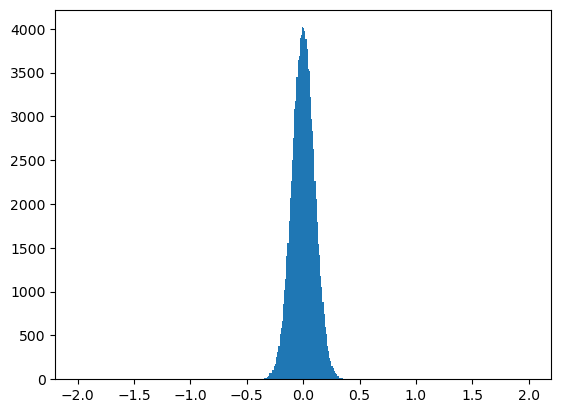

In [38]:
plt.hist(means,bins=np.arange(-2,2 + 0.01,0.01))
print( np.std(means),np.std(means,ddof=1) )

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,   2.,   1.,
          2.,   0.,   1.,   1.,   3.,   3.,   0.,   1.,   0.,   4.,   1.,
          1.,   4.,   5.,   2.,   2.,   3.,   4.,   7.,   4.,   2.,   3.,
          5.,   1.,   8.,   4.,  10.,  10.,  15.,   5.,   8.,  12.,  15.,
         18.,  14.,  16.,  11.,  19.,  22.,  17.,  22.,  25.,  29.,  33.,
         23.,  21.,  24.,  28.,  28.,  34.,  34.,  37.,  37.,  39.,  38.,
         43.,  44.,  57.,  57.,  48.,  67.,  81.,  68.,  72.,  75.,  79.,
         87.,  69.,  94., 111., 101.,  98., 129., 152., 123., 145., 135.,
        147., 125., 162., 159., 171., 152., 192., 223., 200., 213., 214.,
        242., 237., 265., 258., 259., 263., 275., 306., 323., 317., 341.,
        388., 330., 370., 361., 379., 401., 385., 450., 486., 430., 502.,
        472., 513., 500., 509., 535., 563., 542., 576., 608., 608., 596.,
        630., 639., 647., 672., 740., 

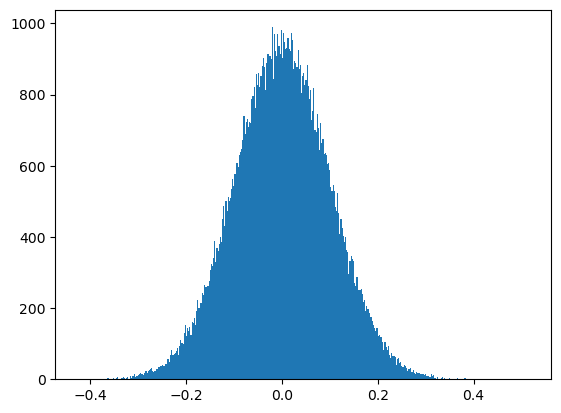

In [36]:
plt.hist(means,bins=400)

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

for navg=100:  0.09995389808740747 0.09995439786064621
for navg=9:  0.3350520838509879 0.33505375912397173


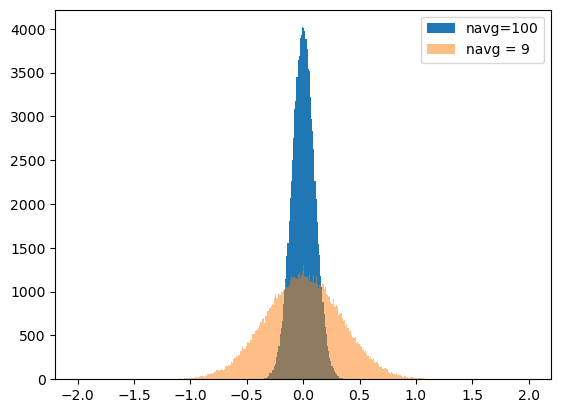

In [45]:
navg=9
data_9=random.randn(nsims,navg)
means_9=np.mean(data_9,axis=1)

plt.hist(means,bins=np.arange(-2,2 + 0.01,0.01),label='navg=100')
print( 'for navg=100: ',np.std(means),np.std(means,ddof=1) )

plt.hist(means_9,bins=np.arange(-2,2 + 0.01,0.01),alpha=0.5,label='navg = 9')
print( 'for navg=9: ', np.std(means_9),np.std(means_9,ddof=1) )
plt.legend()

# If you have extra time

- Try a wide variety of binnings and explore how the mode of our lognormal data changes as the bin size does.

- Create a dataset that is drawn from two different distributions:
    - 90% of the time draw from a standard normal ($N(0,1)$)
    - 10% of the time draw a value from a different distribution: $\exp(N(0,1)$)

    Calculate all of our measures of location and scale for this mixed dataset.  Which (if any) give you the expected values for a standard normal distribution?
